## WeGo Data Introduction

want to get the exact WeGo color codes for making visualizations
1 week from today have initial Qs and visualizations done (Sept 14th)
if you finish early, find someone to help

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wego = pd.read_csv("C:\da12\projects\wego-python-da12-python-spice-lattes\data\Headway Data.csv")
wego.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\1836037110.py:1: SyntaxWarning: invalid escape sequence '\d'
  wego = pd.read_csv("C:\da12\projects\wego-python-da12-python-spice-lattes\data\Headway Data.csv")


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [6]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [7]:
num_columns = wego.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 30


In [8]:
pd.set_option('display.max_columns', None)

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [10]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [12]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:20]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00
4,2023-08-01,120230801,345105,22,MCC5_10,1,2023-08-01 05:15:00
5,2023-08-01,120230801,345105,22,CV23,0,2023-08-01 05:25:00
6,2023-08-01,120230801,345105,22,MHSP,2,2023-08-01 05:32:00
7,2023-08-01,120230801,345106,22,MHSP,1,2023-08-01 05:42:00
8,2023-08-01,120230801,345106,22,ELIZ,0,2023-08-01 05:46:00
9,2023-08-01,120230801,345106,22,CV23,0,2023-08-01 05:54:00


Note that the same TRIP_ID appears on the following day.

In [14]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [16]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [18]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


In [19]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


And one which was early.

In [21]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [23]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [25]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


unique trips?

In [27]:
unique_trip_ids = wego['TRIP_ID'].unique()
print(unique_trip_ids)

[345104 345105 345106 ... 354069 354098 354106]


In [28]:
num_unique_trip_ids = wego['TRIP_ID'].nunique()
print(f"Number of unique TRIP_IDs: {num_unique_trip_ids}")


Number of unique TRIP_IDs: 3987


1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

Overall On-Time Performance: 77.08%


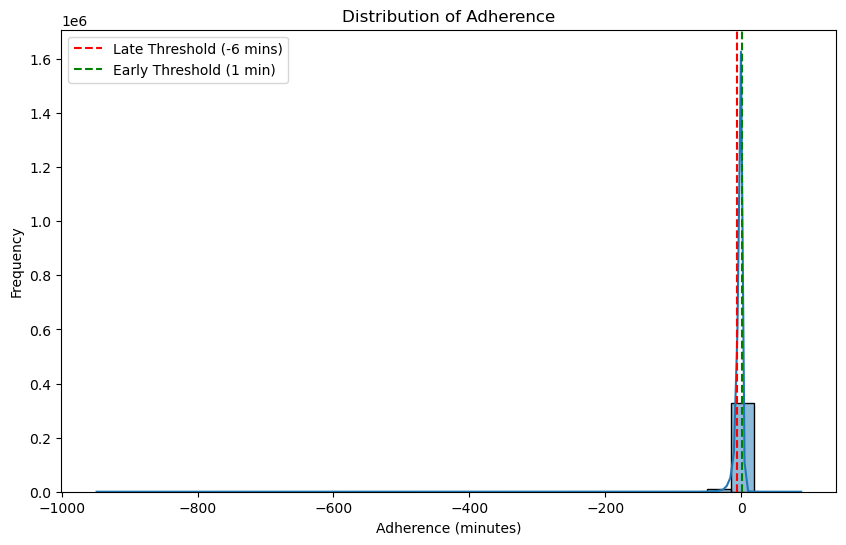

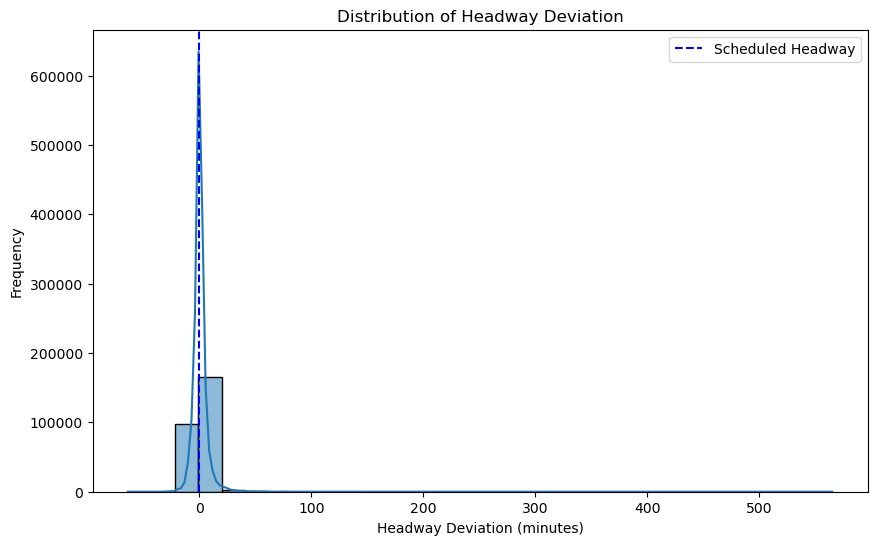

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame `df` with the relevant columns

# Overall on-time performance
total_trips = len(wego)
on_time_count = wego['ADJUSTED_ONTIME_COUNT'].sum()
on_time_percentage = (on_time_count / total_trips) * 100
print(f'Overall On-Time Performance: {on_time_percentage:.2f}%')

# Adherence distribution
plt.figure(figsize=(10,6))
sns.histplot(wego['ADHERENCE'], bins=30, kde=True)
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='r', linestyle='--', label='Late Threshold (-6 mins)')
plt.axvline(x=1, color='g', linestyle='--', label='Early Threshold (1 min)')
plt.legend()
plt.show()

# Headway Deviation distribution
plt.figure(figsize=(10,6))
sns.histplot(wego['HDWY_DEV'], bins=30, kde=True)
plt.title('Distribution of Headway Deviation')
plt.xlabel('Headway Deviation (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='b', linestyle='--', label='Scheduled Headway')
plt.legend()
plt.show()


2. How does direction of travel, route, or location affect the headway and on-time performance?

In [32]:
import pandas as pd

# Assuming `df` is your DataFrame

# Group by direction of travel and calculate average headway deviation
direction_grouped = wego.groupby('ROUTE_DIRECTION_NAME').agg({
    'HDWY_DEV': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}).reset_index()

# Calculate on-time percentage for each direction
direction_grouped['on_time_percentage'] = (direction_grouped['ADJUSTED_ONTIME_COUNT'] / 
                                           (direction_grouped['ADJUSTED_ONTIME_COUNT'] + 
                                            direction_grouped['ADJUSTED_LATE_COUNT'] + 
                                            direction_grouped['ADJUSTED_EARLY_COUNT'])) * 100

print(direction_grouped)


  ROUTE_DIRECTION_NAME  HDWY_DEV  ADJUSTED_ONTIME_COUNT  ADJUSTED_LATE_COUNT  \
0        FROM DOWNTOWN  0.579990                 134414                39601   
1          TO DOWNTOWN  0.447773                 135634                19437   

   ADJUSTED_EARLY_COUNT  on_time_percentage  
0                  5291           74.963470  
1                  4484           85.007678  






3. How does time of day or day of week affect headway and on-time performance?


   

In [34]:
wego.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [35]:
# What's the data type of the time columns?
print(wego['ACTUAL_DEPARTURE_TIME'].dtype)
print(wego['ACTUAL_ARRIVAL_TIME'].dtype)


object
object


In [36]:
# Converting 'ACTUAL_DEPARTURE_TIME' to datetime
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'], errors='coerce')
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], errors='coerce')

# Verifying conversion
print(wego['ACTUAL_DEPARTURE_TIME'].dtype)


datetime64[ns]


In [37]:
# Dropping rows where 'HDWY_DEV' has NaN values
wego_cleaned = wego.dropna(subset=['HDWY_DEV'])

#making sure
print(wego_cleaned['HDWY_DEV'].isna().sum()) 


0


Adjusted for crunching and bunching

C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\731293232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_filtered['hour_of_day'] = pd.to_datetime(wego_filtered['ACTUAL_DEPARTURE_TIME']).dt.hour


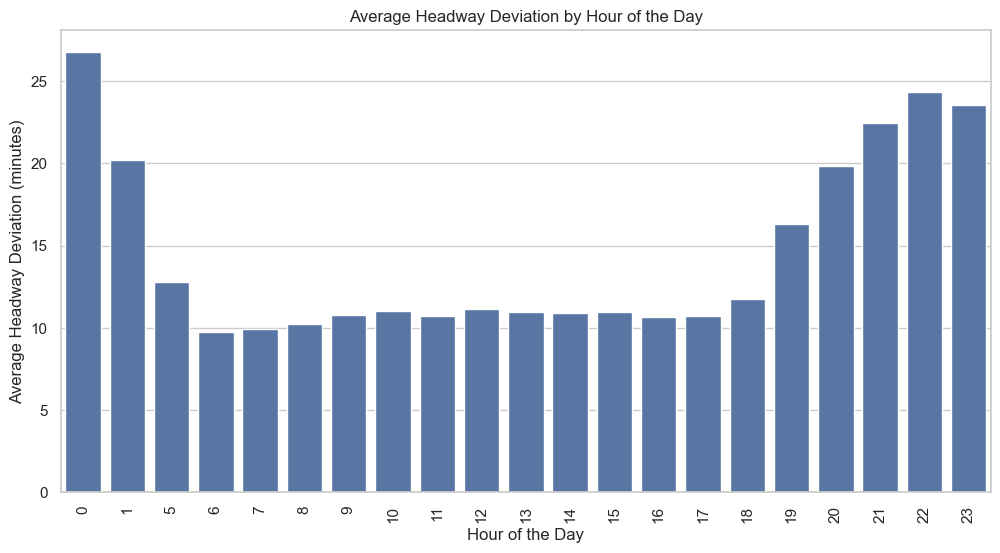

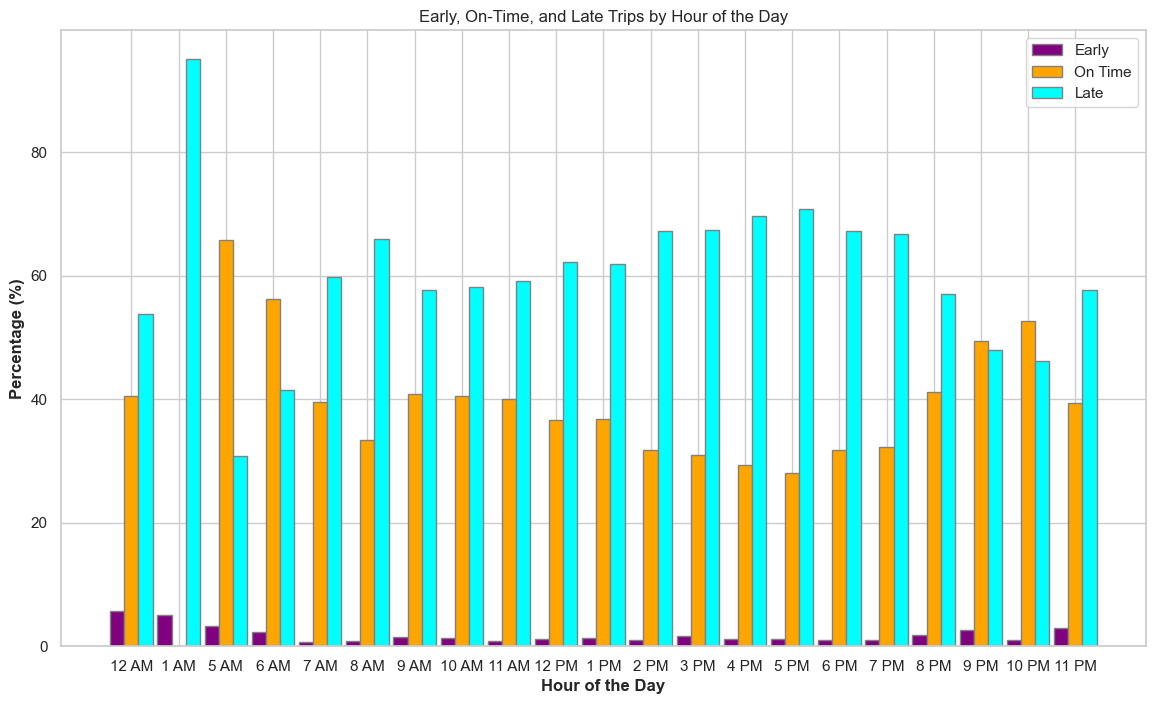

In [95]:
#hdwy dev percentage
wego['HDWY_DEV_PERCENT'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY'] * 100

# bunching (negative) or gapping (positive)
wego['BUNCHING_OR_GAPPING'] = wego['HDWY_DEV'].apply(lambda x: 'Bunching' if x < 0 else 'Gapping')

# include only rows where hdwy dev percentage is between 50% and 150% of scheduled hdwy/ omitting outliers
wego_filtered = wego[(wego['HDWY_DEV_PERCENT'] >= 50) & (wego['HDWY_DEV_PERCENT'] <= 150)]

# convert dt format to hour to analyze by hour
wego_filtered['hour_of_day'] = pd.to_datetime(wego_filtered['ACTUAL_DEPARTURE_TIME']).dt.hour

# grouping important metrics
hourly_grouped = wego_filtered.groupby('hour_of_day').agg({
    'HDWY_DEV': 'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
}).reset_index()

# summing early, on-time, and late trips
hourly_grouped['total_count'] = (hourly_grouped['ADJUSTED_EARLY_COUNT'] + 
                                 hourly_grouped['ADJUSTED_ONTIME_COUNT'] + 
                                 hourly_grouped['ADJUSTED_LATE_COUNT'])

# percentage of early, on-time, and late trips
hourly_grouped['early_percentage'] = (hourly_grouped['ADJUSTED_EARLY_COUNT'] / 
                                      hourly_grouped['total_count']) * 100
hourly_grouped['ontime_percentage'] = (hourly_grouped['ADJUSTED_ONTIME_COUNT'] / 
                                       hourly_grouped['total_count']) * 100
hourly_grouped['late_percentage'] = (hourly_grouped['ADJUSTED_LATE_COUNT'] / 
                                     hourly_grouped['total_count']) * 100

# chatPlot

# Set the plot style
sns.set(style='whitegrid')

# Create a bar plot for the average headway deviation by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='HDWY_DEV', data=hourly_grouped)
plt.title('Average Headway Deviation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=90)
plt.show()

# Set the bar width
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(hourly_grouped['hour_of_day']))  # For Early
r2 = [x + bar_width for x in r1]  # For On-Time
r3 = [x + bar_width for x in r2]  # For Late

# Convert hours to 12-hour format with AM/PM
hourly_grouped['hour_am_pm'] = hourly_grouped['hour_of_day'].apply(lambda x: f"{x%12 if x%12 != 0 else 12}{' AM' if x < 12 else ' PM'}")

# Create the bar plots with different colors
plt.figure(figsize=(14, 8))
plt.bar(r1, hourly_grouped['early_percentage'], color='purple', width=bar_width, edgecolor='gray', label='Early')
plt.bar(r2, hourly_grouped['ontime_percentage'], color='orange', width=bar_width, edgecolor='gray', label='On Time')
plt.bar(r3, hourly_grouped['late_percentage'], color='cyan', width=bar_width, edgecolor='gray', label='Late')

# Add labels and title
plt.xlabel('Hour of the Day', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Early, On-Time, and Late Trips by Hour of the Day')

# Add x-ticks on the middle of the grouped bars using 12-hour AM/PM format
plt.xticks([r + bar_width for r in range(len(hourly_grouped['hour_of_day']))], hourly_grouped['hour_am_pm'])

# Add legend
plt.legend()

# Show the plot
plt.show()



  day_of_week  HDWY_DEV  ADHERENCE  early_percentage  ontime_percentage  \
0      Friday  0.644195  -3.792110          2.855403          75.686085   
1      Monday  0.289773  -2.434586          3.425284          83.363799   
2    Saturday  0.633628  -3.400493          2.309380          80.175535   
3      Sunday  1.016830  -2.808781          3.012089          83.966259   
4    Thursday  0.524049  -3.455171          2.813372          78.255461   
5     Tuesday  0.401450  -2.952484          2.857754          80.122297   
6   Wednesday  0.368556  -3.264622          2.855986          79.006216   

   late_percentage  
0        21.458512  
1        13.210918  
2        17.515085  
3        13.021652  
4        18.931167  
5        17.019949  
6        18.137799  


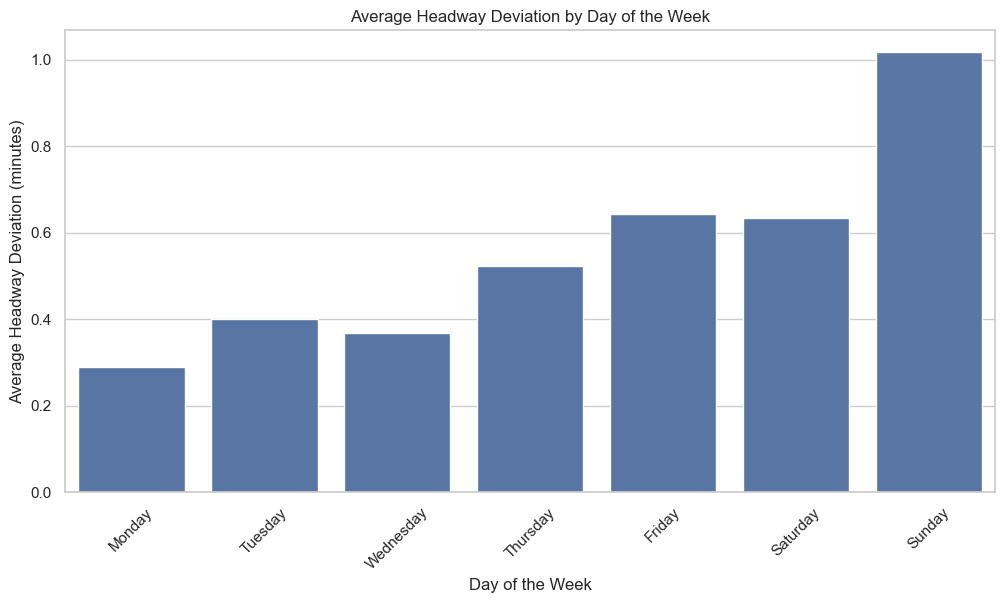

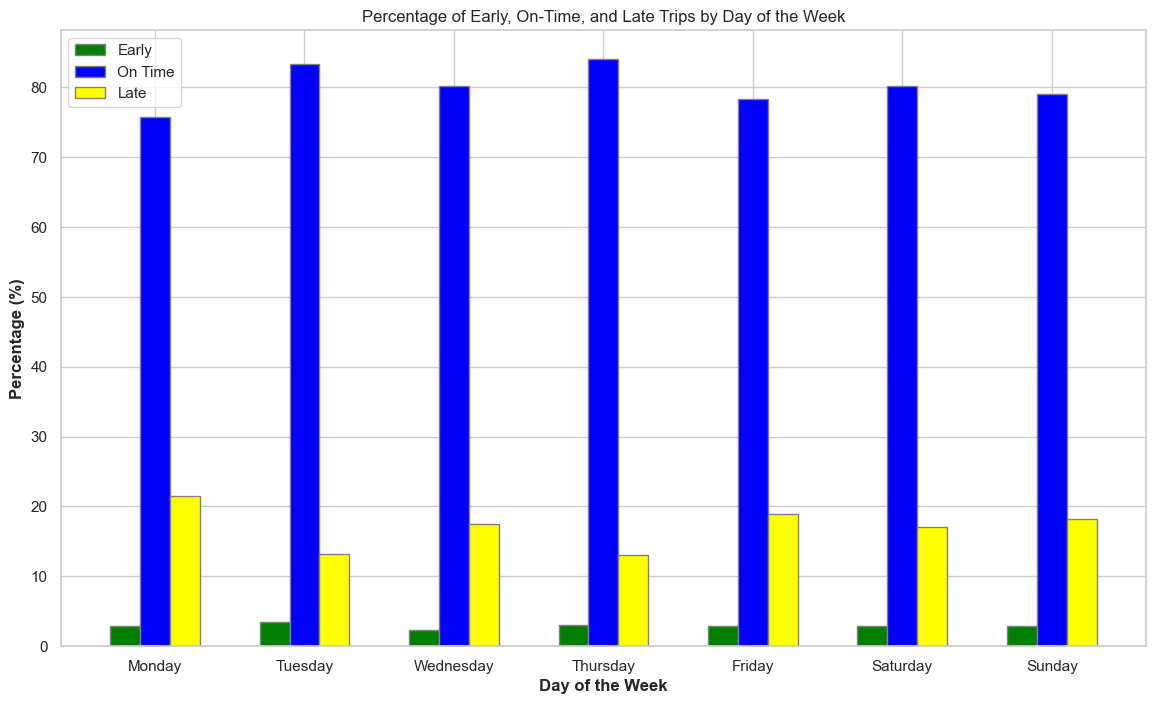

In [101]:
# Extract day of the week from 'ACTUAL_DEPARTURE_TIME'
wego['day_of_week'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME']).dt.dayofweek

# Create a mapping from numbers to day names (optional for better readability)
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
wego['day_of_week'] = wego['day_of_week'].map(day_mapping)
# Group by day of the week and calculate necessary metrics
weekly_grouped = wego.groupby('day_of_week').agg({
    'HDWY_DEV': 'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum'
}).reset_index()

# Calculate total counts for each day (to get percentages)
weekly_grouped['total_count'] = (weekly_grouped['ADJUSTED_EARLY_COUNT'] + 
                                 weekly_grouped['ADJUSTED_ONTIME_COUNT'] + 
                                 weekly_grouped['ADJUSTED_LATE_COUNT'])

# Calculate percentage of early, on-time, and late trips
weekly_grouped['early_percentage'] = (weekly_grouped['ADJUSTED_EARLY_COUNT'] / 
                                      weekly_grouped['total_count']) * 100
weekly_grouped['ontime_percentage'] = (weekly_grouped['ADJUSTED_ONTIME_COUNT'] / 
                                       weekly_grouped['total_count']) * 100
weekly_grouped['late_percentage'] = (weekly_grouped['ADJUSTED_LATE_COUNT'] / 
                                     weekly_grouped['total_count']) * 100

# Print the results for validation
print(weekly_grouped[['day_of_week', 'HDWY_DEV', 'ADHERENCE', 'early_percentage', 'ontime_percentage', 'late_percentage']])
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='HDWY_DEV', data=weekly_grouped, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Headway Deviation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=45)
plt.show()

import numpy as np

# Set the bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(weekly_grouped['day_of_week']))  # For Early
r2 = [x + bar_width for x in r1]  # For On-Time
r3 = [x + bar_width for x in r2]  # For Late

# Days of the week labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the bar plots with different colors (avoiding red)
plt.figure(figsize=(14, 8))
plt.bar(r1, weekly_grouped['early_percentage'], color='green', width=bar_width, edgecolor='gray', label='Early')
plt.bar(r2, weekly_grouped['ontime_percentage'], color='blue', width=bar_width, edgecolor='gray', label='On Time')
plt.bar(r3, weekly_grouped['late_percentage'], color='yellow', width=bar_width, edgecolor='gray', label='Late')

# Add labels and title
plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.title('Percentage of Early, On-Time, and Late Trips by Day of the Week')

# Add x-ticks with day of the week labels
plt.xticks([r + bar_width for r in range(len(weekly_grouped['day_of_week']))], days_of_week)

# Add legend
plt.legend()

# Show the plot
plt.show()



CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                             
3          FROM DOWNTOWN         1.202309e+08      1.317378  1.001027e+08   
           TO DOWNTOWN           1.202309e+08      1.318220  1.001025e+08   
7          FROM DOWNTOWN         1.202309e+08      1.309454  1.001071e+08   
           TO DOWNTOWN           1.202309e+08      1.317787  1.001081e+08   
22         FROM DOWNTOWN         1.202309e+08      1.282716  1.001000e+08   
           TO DOWNTOWN           1.202309e+08      1.267361  1.001002e+08   
23         FROM DOWNTOWN         1.202309e+08      1.319882  1.001010e+08   
           TO DOWNTOWN           1.202309e+08      1.264792  1.000996e+08   
50         FROM DOWNTOWN         1.202309e+08      1.331727  1.001049e+08   
           TO DOWNTOWN           1.202309e+08      1.329388  1.001056e+08   
52         FROM DOWNTOWN         1.202309e+08      1.307581  1.001047e+08   
           TO DOWNTOWN           1.202309e+08      1.303458  1.001035e+08   
55         FROM DOWNTOWN         1.202309e+08      1.290132  1.001047e+08   
           TO DOWNTOWN           1.202309e+08      1.283345  1.001053e+08   
56         FROM DOWNTOWN         1.202309e+08      1.273283  1.001050e+08   
           TO DOWNTOWN           1.202309e+08      1.270146  1.001054e+08   

                                  BLOCK_ABBR     OPERATOR        TRIP_ID  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                            
3          FROM DOWNTOWN          307.911501  1983.260888  350814.314757   
           TO DOWNTOWN            307.323707  1950.972610  350812.430078   
7          FROM DOWNTOWN          702.291680  1988.000763  353147.774179   
           TO DOWNTOWN            777.445285  1946.277696  353096.431282   
22         FROM DOWNTOWN         2203.612115  1977.400060  349834.570063   
           TO DOWNTOWN           2239.345557  1924.654125  349854.452550   
23         FROM DOWNTOWN         2309.249872  1855.812280  350160.439171   
           TO DOWNTOWN           2308.204671  1784.365846  350129.973843   
50         FROM DOWNTOWN         5027.125869  1753.479980  351549.450737   
           TO DOWNTOWN           5018.351034  1764.211947  351550.048957   
52         FROM DOWNTOWN         5208.139003  2096.442317  351888.913318   
           TO DOWNTOWN           5207.876196  2008.250663  351880.988018   
55         FROM DOWNTOWN         5505.248201  2039.445942  352273.866230   
           TO DOWNTOWN           5515.700740  1942.437442  352281.772889   
56         FROM DOWNTOWN         5605.065429  2048.467914  352687.183636   
           TO DOWNTOWN           5601.838912  2002.313577  352685.215557   

                                 OVERLOAD_ID  ROUTE_STOP_SEQUENCE  TRIP_EDGE  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                                
3          FROM DOWNTOWN            0.008372             4.455603   0.543552   
           TO DOWNTOWN              0.005827             4.435437   0.547125   
7          FROM DOWNTOWN            0.004034             4.000000   0.998910   
           TO DOWNTOWN              0.003162             3.986900   1.000113   
22         FROM DOWNTOWN            0.002689             6.285405   0.850911   
           TO DOWNTOWN              0.003500             5.412060   0.915043   
23         FROM DOWNTOWN            0.002843             4.660836   0.525765   
           TO DOWNTOWN              0.002085             3.499911   0.749806   
50         FROM DOWNTOWN            0.007878            14.462879   0.506025   
           TO DOWNTOWN              0.005757            14.380694   0.512965   
52         FROM DOWNTOWN            0.011281             5.843816   0.496271   
           TO DOWNTOWN              0.005468             4.608203   0.536671   
55         FROM DOWNTOWN            0.008888             8.160725   0.501156   
           TO DOWNTOWN              0.007750             8.115413   0.512633  

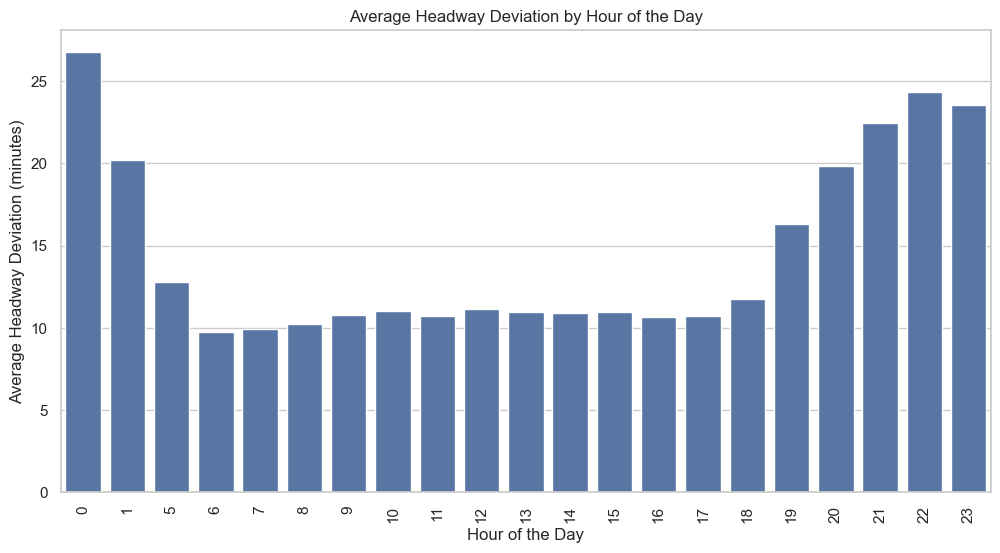

In [41]:
# Set the plot style
sns.set(style='whitegrid')

# Create a bar plot for the average headway deviation by hour of the day
plt.figure(figsize=(12, 6))

# Plot headway deviation by hour of the day
sns.barplot(x='hour_of_day', y='HDWY_DEV', data=hourly_grouped)
plt.title('Average Headway Deviation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=90)
plt.show()


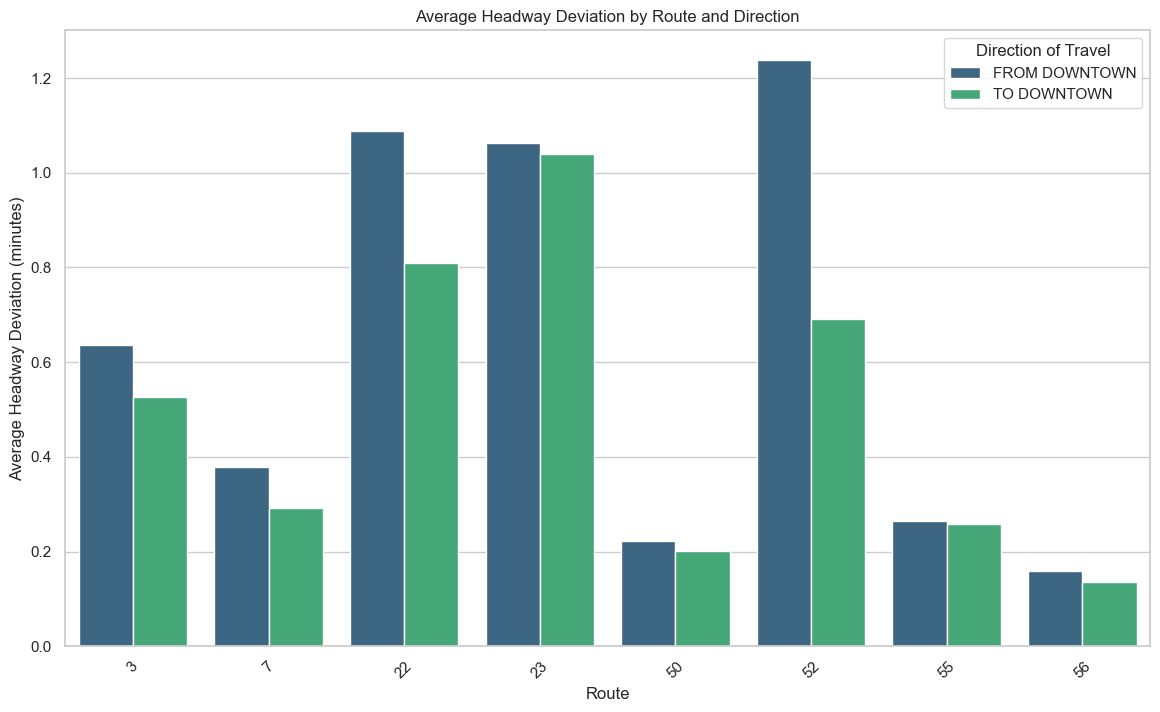

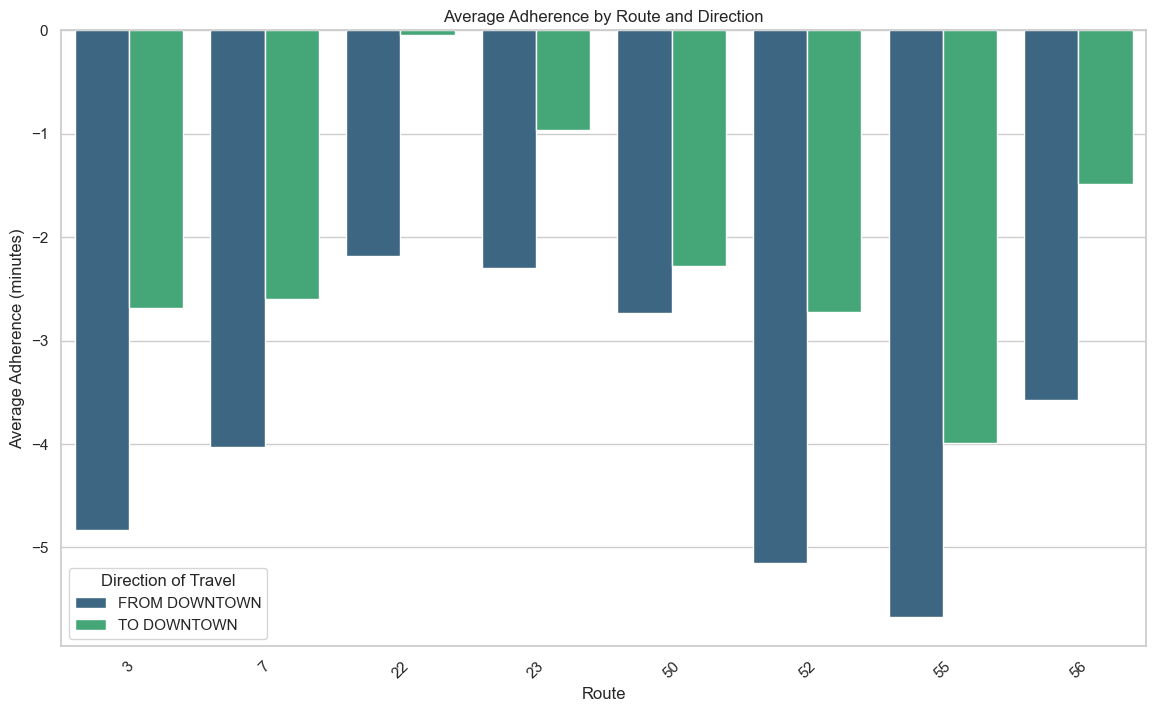

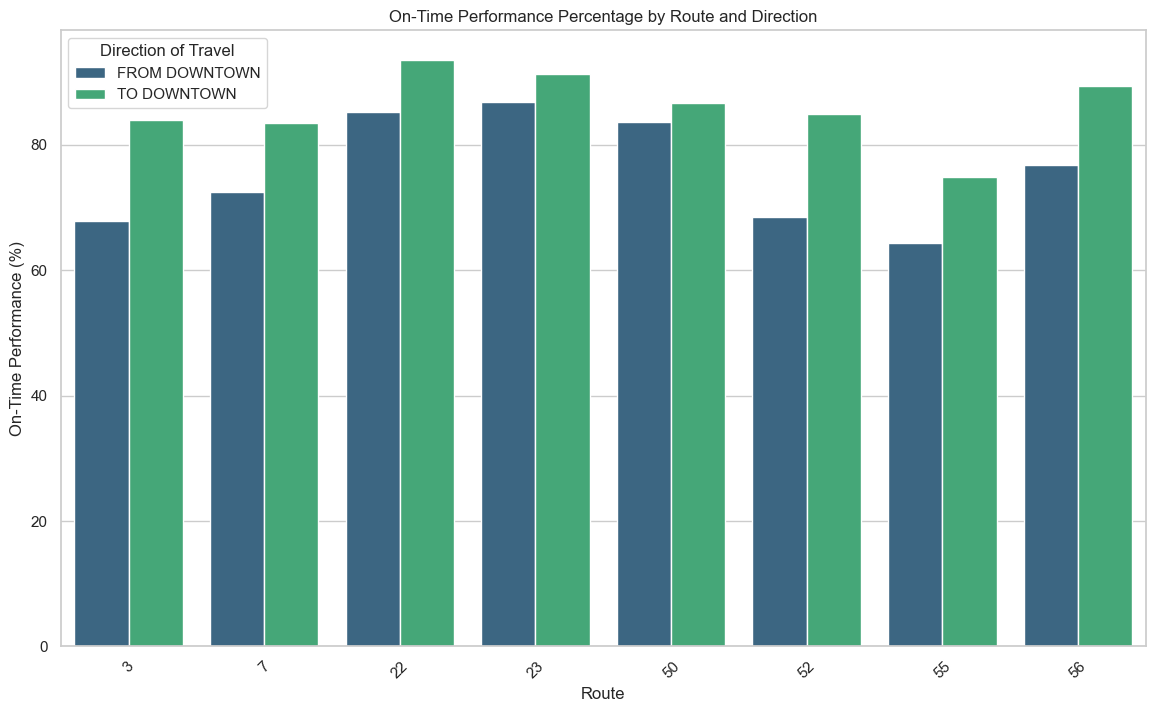

In [125]:
# Calculate average headway deviation and on-time performance
route_v_dir_performance_df = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg({
    'HDWY_DEV': 'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}).reset_index()

# Calculate on-time percentage for each combination of route and direction
route_v_dir_performance_df['on_time_percentage'] = (
    route_v_dir_performance_df['ADJUSTED_ONTIME_COUNT'] / 
    (route_v_dir_performance_df['ADJUSTED_ONTIME_COUNT'] + 
     route_v_dir_performance_df['ADJUSTED_LATE_COUNT'] + 
     route_v_dir_performance_df['ADJUSTED_EARLY_COUNT'])
) * 100

# Plot average headway deviation by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='ROUTE_ABBR', y='HDWY_DEV', hue='ROUTE_DIRECTION_NAME', data=route_v_dir_performance_df, palette='viridis')
plt.title('Average Headway Deviation by Route and Direction')
plt.xlabel('Route')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()

# Plot average adherence by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='ROUTE_ABBR', y='ADHERENCE', hue='ROUTE_DIRECTION_NAME', data=route_v_dir_performance_df, palette='viridis')
plt.title('Average Adherence by Route and Direction')
plt.xlabel('Route')
plt.ylabel('Average Adherence (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()

# Plot on-time performance percentage by route and direction
plt.figure(figsize=(14, 8))
sns.barplot(x='ROUTE_ABBR', y='on_time_percentage', hue='ROUTE_DIRECTION_NAME', data=route_v_dir_performance_df, palette='viridis')
plt.title('On-Time Performance Percentage by Route and Direction')
plt.xlabel('Route')
plt.ylabel('On-Time Performance (%)')
plt.xticks(rotation=45)
plt.legend(title='Direction of Travel')
plt.show()


In [42]:
#by route
# Grouped by route with average headway deviation and on-time performance
route_grouped = wego.groupby('ROUTE_ABBR').agg({
    'HDWY_DEV': 'mean',
    'ADHERENCE': 'mean',  # Average adherence
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}).reset_index()

# On-time percentage for each route
route_grouped['on_time_percentage'] = (route_grouped['ADJUSTED_ONTIME_COUNT'] / 
                                       (route_grouped['ADJUSTED_ONTIME_COUNT'] + 
                                        route_grouped['ADJUSTED_LATE_COUNT'] + 
                                        route_grouped['ADJUSTED_EARLY_COUNT'])) * 100

print(route_grouped)


   ROUTE_ABBR  HDWY_DEV  ADHERENCE  ADJUSTED_ONTIME_COUNT  \
0           3  0.580907  -3.761491                  34516   
1           7  0.336808  -3.346555                  13417   
2          22  0.955867  -1.138107                  22492   
3          23  1.053563  -1.760110                  35137   
4          50  0.212376  -2.505022                  36309   
5          52  0.974776  -3.971342                  37736   
6          55  0.261038  -4.823302                  42080   
7          56  0.149213  -2.703988                  48361   

   ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  on_time_percentage  
0                 9590                  1382           75.879353  
1                 3417                   433           77.703133  
2                 2065                   631           89.296490  
3                 3230                  1286           88.611202  
4                 5113                  1207           85.174412  
5                10038                  1553    

C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\2204674624.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROUTE_DIRECTION_NAME', y='HDWY_DEV', data=direction_grouped, ax=axes[0], palette='Blues_d')
C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\2204674624.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROUTE_DIRECTION_NAME', y='on_time_percentage', data=direction_grouped, ax=axes[1], palette='Greens_d')


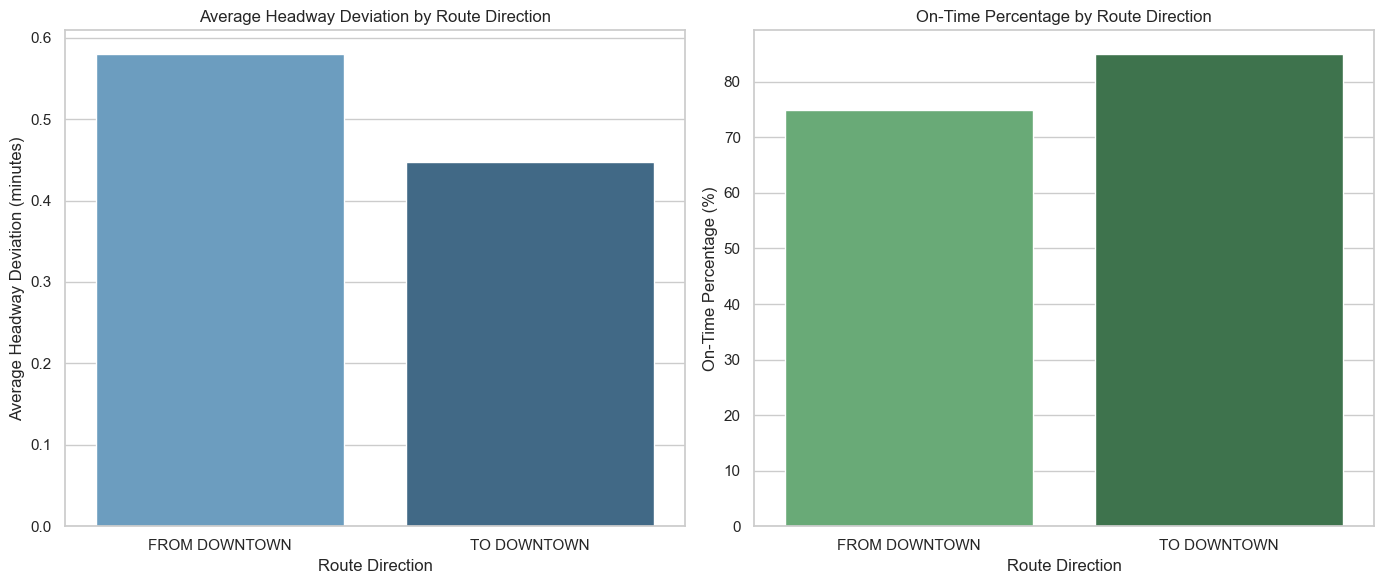

In [43]:
#plotted
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for average headway deviation
sns.barplot(x='ROUTE_DIRECTION_NAME', y='HDWY_DEV', data=direction_grouped, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Headway Deviation by Route Direction')
axes[0].set_xlabel('Route Direction')
axes[0].set_ylabel('Average Headway Deviation (minutes)')

# Bar plot for on-time percentage
sns.barplot(x='ROUTE_DIRECTION_NAME', y='on_time_percentage', data=direction_grouped, ax=axes[1], palette='Greens_d')
axes[1].set_title('On-Time Percentage by Route Direction')
axes[1].set_xlabel('Route Direction')
axes[1].set_ylabel('On-Time Percentage (%)')

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\623066832.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='HDWY_DEV', data=combined_outliers, palette='coolwarm')


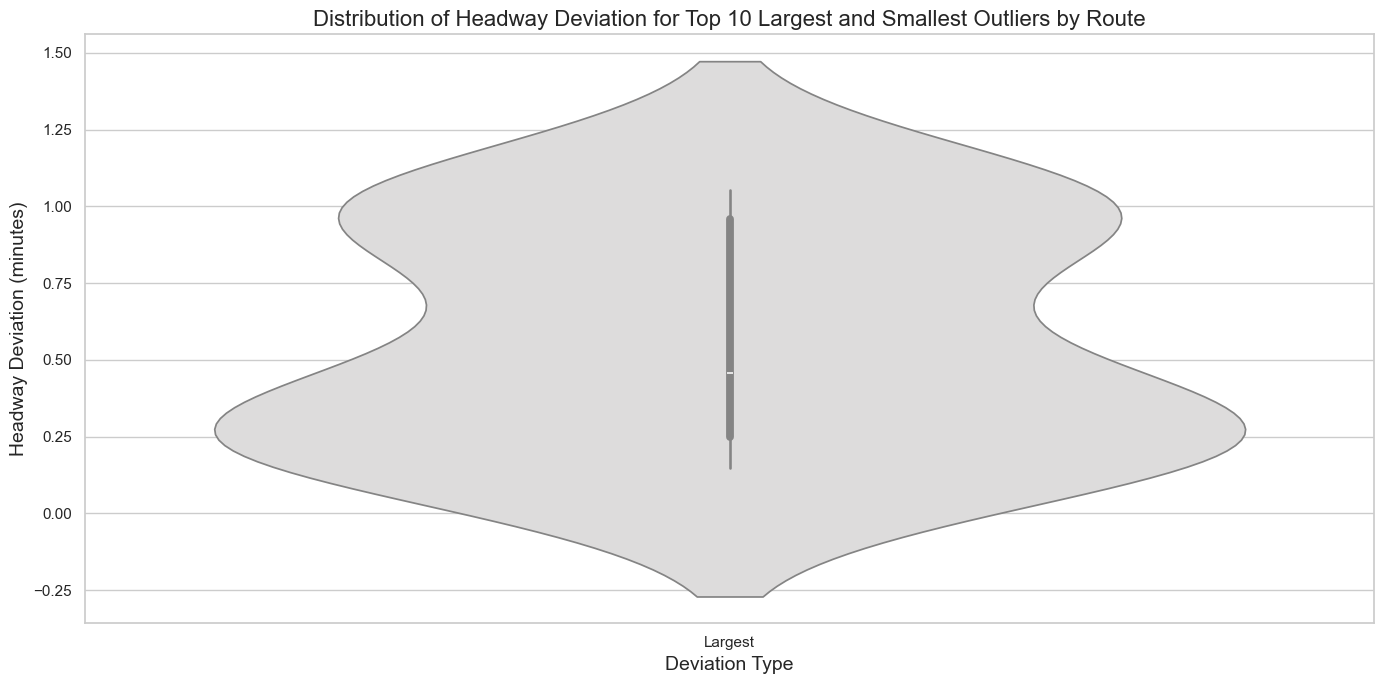

In [44]:
# Getting the top 10 largest deviations
top_10_largest = route_grouped.nlargest(10, 'HDWY_DEV')

# Getting the top 10 smallest deviations
top_10_smallest = route_grouped.nsmallest(10, 'HDWY_DEV')

# Combining both sets into one DataFrame
combined_outliers = pd.concat([top_10_largest, top_10_smallest])

combined_outliers['Type'] = combined_outliers['HDWY_DEV'].apply(
    lambda x: 'Largest' if x in top_10_largest['HDWY_DEV'].values else 'Smallest'
)

# Plot using a violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='Type', y='HDWY_DEV', data=combined_outliers, palette='coolwarm')

# Add titles and labels
plt.title('Distribution of Headway Deviation for Top 10 Largest and Smallest Outliers by Route', fontsize=16)
plt.xlabel('Deviation Type', fontsize=14)
plt.ylabel('Headway Deviation (minutes)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [45]:
# You may need to round latitude and longitude to group them better (for example, by area)
wego['LAT_LON'] = wego['LATITUDE'].round(3).astype(str) + ', ' + wego['LONGITUDE'].round(3).astype(str)

# Group by location
location_grouped = wego.groupby('LAT_LON').agg({
    'HDWY_DEV': 'mean',
    'ADHERENCE': 'mean',
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}).reset_index()

# Calculate on-time percentage for each location
location_grouped['on_time_percentage'] = (location_grouped['ADJUSTED_ONTIME_COUNT'] / 
                                          (location_grouped['ADJUSTED_ONTIME_COUNT'] + 
                                           location_grouped['ADJUSTED_LATE_COUNT'] + 
                                           location_grouped['ADJUSTED_EARLY_COUNT'])) * 100

print(location_grouped)


            LAT_LON  HDWY_DEV  ADHERENCE  ADJUSTED_ONTIME_COUNT  \
0   36.049, -86.714  0.827780  -3.253180                   3686   
1   36.053, -86.655  0.274289  -4.271982                   7670   
2   36.069, -86.933  0.982707  -2.342674                   1836   
3   36.069, -86.934  1.335219  -5.345743                   1227   
4   36.072, -86.636  0.280872  -7.831276                   2542   
..              ...       ...        ...                    ...   
60  36.244, -86.761  0.502934  -2.072913                  11535   
61  36.257, -86.714  0.128788  -2.699881                   8346   
62    36.3, -86.696  0.164831  -2.299136                   8429   
63  36.301, -86.695  0.176776  -3.784911                   3384   
64  36.308, -86.686  0.262244  -4.919132                   3171   

    ADJUSTED_LATE_COUNT  ADJUSTED_EARLY_COUNT  on_time_percentage  
0                   765                    45           81.983986  
1                  2190                    67           77.

C:\Users\ericj\AppData\Local\Temp\ipykernel_2276\1051668497.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LAT_LON', y='HDWY_DEV', data=combined_outliers, palette='coolwarm')


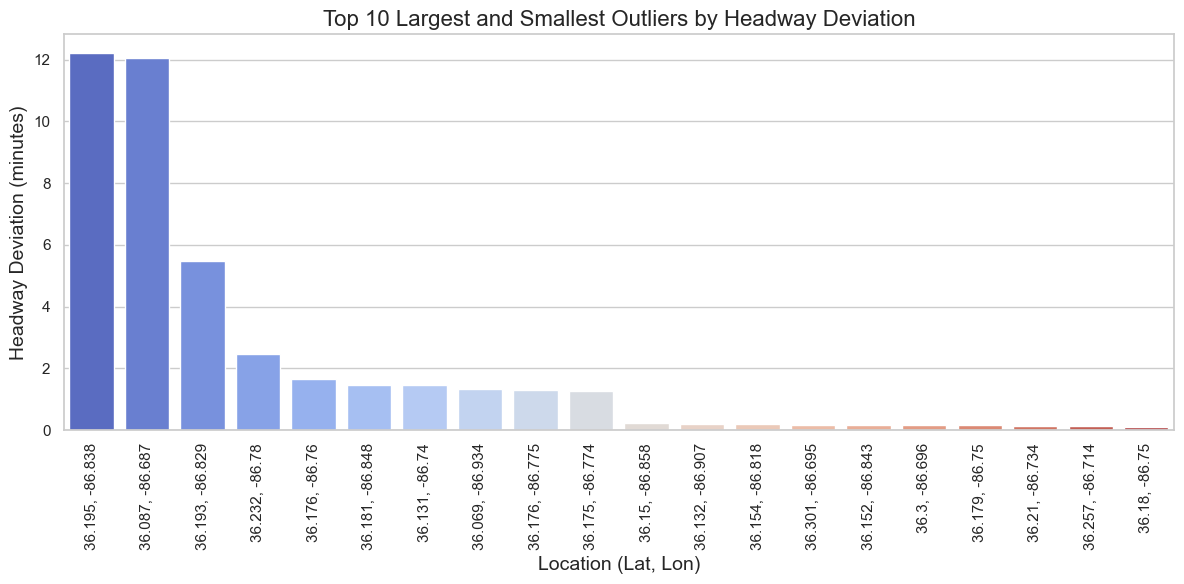

In [46]:
location_grouped['abs_hwy_dev'] = location_grouped['HDWY_DEV'].abs()

# Get the top 10 largest deviations (both positive and negative)
top_10_largest = location_grouped.nlargest(10, 'abs_hwy_dev')

# Get the top 10 smallest deviations (both positive and negative)
top_10_smallest = location_grouped.nsmallest(10, 'abs_hwy_dev')

# Combine both sets into one DataFrame
combined_outliers = pd.concat([top_10_largest, top_10_smallest])

# Sort by 'HDWY_DEV' for better visualization
combined_outliers = combined_outliers.sort_values('HDWY_DEV', ascending=False)

# Plot the combined outliers
plt.figure(figsize=(12, 6))
sns.barplot(x='LAT_LON', y='HDWY_DEV', data=combined_outliers, palette='coolwarm')

# Add titles and labels
plt.title('Top 10 Largest and Smallest Outliers by Headway Deviation', fontsize=16)
plt.xlabel('Location (Lat, Lon)', fontsize=14)
plt.ylabel('Headway Deviation (minutes)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()



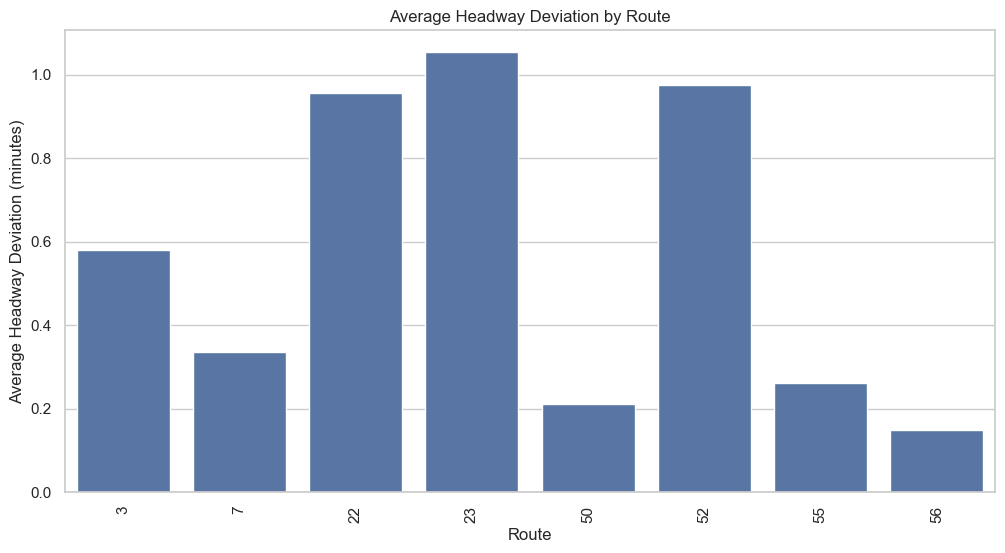

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plot headway deviation by route
plt.figure(figsize=(12, 6))
sns.barplot(x='ROUTE_ABBR', y='HDWY_DEV', data=route_grouped)
plt.title('Average Headway Deviation by Route')
plt.xlabel('Route')
plt.ylabel('Average Headway Deviation (minutes)')
plt.xticks(rotation=90)
plt.show()


4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.